## 3 qubit bit flip code

1000
995
970
941
899
852
757
740
655
576
517
417
360
258
214
155
106
71
36
4
0


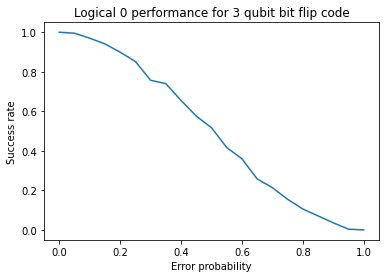

In [432]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister
from qiskit import *
import random

# Initialize lists to store the error probability and success rate
error_probabilities = []
success_rates = []

# Perform error correction at increasing error probabilities
for error_probability in range(0, 101, 5):
    error_probability = error_probability / 100.0
    error_probabilities.append(error_probability)
    
    # Perform 1000 rounds of error correction
    num_successes = 0
    for i in range(1000):
        # Set up the quantum circuit and encode logical 0 state qubit
        qc = QuantumCircuit(5,2)
        qc.cx(0, 1)
        qc.cx(0, 2)
        # Apply a random error to the qubits with the given probability
        for j in range(3):
            if random.random() < error_probability:
                qc.x(j)
        for j in range(3):
            if random.random() < error_probability:
                qc.z(j)
        
        #Entangle with ancilla qubits
        qc.cx(0,3)
        qc.cx(1,3)
        qc.cx(1,4)
        qc.cx(2,4)
           
        qc.measure(3,0)
        qc.measure(4,1)
            
        backend = BasicAer.get_backend('qasm_simulator')
        result = execute(qc, backend).result()
        counts = result.get_counts()
            
        if '01' in counts:
                qc.x(0)
        if '10' in counts:
                qc.x(2)
        if '11' in counts:
                qc.x(1)
            
        # Create a classical register with 3 bits
        cr = ClassicalRegister(3)
            
        # Add the classical register to the quantum circuit
        qc.add_register(cr)
            
            
        qc.measure(0, 2)
        qc.measure(1, 3)
        qc.measure(2, 4)
        
        
        # Measure the qubits and check if the error was corrected successfully
        backend = BasicAer.get_backend('qasm_simulator')
        result = execute(qc, backend,shots = 1).result()
        counts2 = result.get_counts()
        
        if '000 00' in counts2:
            num_successes += counts2['000 00']
        if '000 01' in counts2:
            num_successes += counts2['000 01']
        if '000 10' in counts2:
            num_successes += counts2['000 10']
        if '000 11' in counts2:
            num_successes += counts2['000 11']
        
    print(num_successes)
    # Calculate the success rate and append it to the list
    success_rate = num_successes / 1000.0
    success_rates.append(success_rate)

# Plot the success rate as a function of the error probability
plt.plot(error_probabilities, success_rates)
plt.title('Logical 0 performance for 3 qubit bit flip code')
plt.xlabel('Error probability')
plt.ylabel('Success rate')
plt.show()

1000
860
764
656
586
565
556
526
495
482
486
527
466
506
458
459
370
322
234
135
0


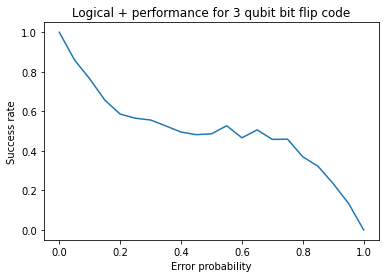

In [433]:
# Initialize lists to store the error probability and success rate
error_probabilities = []
success_rates = []
# Perform error correction at increasing error probabilities
for error_probability in range(0, 101, 5):
    error_probability = error_probability / 100.0
    error_probabilities.append(error_probability)
    
    # Perform 1000 rounds of error correction
    num_successes = 0
    for i in range(1000):
        # Set up the quantum circuit and encode logical 0 state qubit
        qc = QuantumCircuit(5,2)
        qc.h(0)
        qc.cx(0, 1)
        qc.cx(0, 2)
        # Apply a random error to the qubits with the given probability
        for j in range(3):
            if random.random() < error_probability:
                qc.x(j)
        for j in range(3):
            if random.random() < error_probability:
                qc.z(j)
        
        #Entangle with ancilla qubits
        qc.cx(0,3)
        qc.cx(1,3)
        qc.cx(1,4)
        qc.cx(2,4)
            
        qc.measure(3,0)
        qc.measure(4,1)
            
        backend = BasicAer.get_backend('qasm_simulator')
        result = execute(qc, backend).result()
        counts = result.get_counts()
            
        if '01' in counts:
                qc.x(0)
        if '10' in counts:
                qc.x(2)
        if '11' in counts:
                qc.x(1)
            
        # Create a classical register with 3 bits
        cr = ClassicalRegister(3)
            
        # Add the classical register to the quantum circuit
        qc.add_register(cr)
            
        #decode
        qc.cx(0,1)
        qc.cx(0,2)
        qc.h(0)
        
        qc.measure(0, 2)
        qc.measure(1, 3)
        qc.measure(2, 4)
        
        
        # Measure the qubits and check if the error was corrected successfully
        backend = BasicAer.get_backend('qasm_simulator')
        result = execute(qc, backend,shots = 1).result()
        counts2 = result.get_counts()
        
        if '000 00' in counts2:
            num_successes += counts2['000 00']
        if '000 01' in counts2:
            num_successes += counts2['000 01']
        if '000 10' in counts2:
            num_successes += counts2['000 10']
        if '000 11' in counts2:
            num_successes += counts2['000 11']
        
    print(num_successes)
    # Calculate the success rate and append it to the list
    success_rate = num_successes / 1000.0
    success_rates.append(success_rate)

# Plot the success rate as a function of the error probability
plt.plot(error_probabilities, success_rates)
plt.title('Logical + performance for 3 qubit bit flip code')
plt.xlabel('Error probability')
plt.ylabel('Success rate')
plt.show()

This code simulates a quantum error correction circuit to correct bit flip errors. It performs error correction at increasing error probabilities, starting from 0% and increasing by 5% at each iteration up to 100%.

For each error probability, the code performs 1000 rounds of error correction. In each round, it sets up a quantum circuit with 3 qubits and applies a random bit flip error to the qubits with the given probability. It then entangles the qubits with 2 ancilla qubits, measures the ancilla qubits, and applies correction gates to the original qubits based on the measurement results. Finally, it measures the original qubits and checks if the error was corrected successfully.

The code then calculates the success rate as the number of successful error corrections divided by the total number of rounds, and plots the success rate as a function of the error probability.

## 3 qubit Phase flip code

0.0 1000
0.05 996
0.1 970
0.15 928
0.2 894
0.25 832
0.3 765
0.35 733
0.4 654
0.45 559
0.5 481
0.55 421
0.6 341
0.65 272
0.7 219
0.75 164
0.8 111
0.85 54
0.9 30
0.95 8
1.0 0


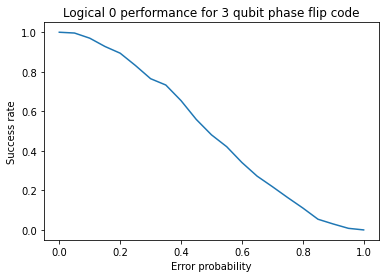

In [431]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister
from qiskit import *
import random

# Initialize lists to store the error probability and success rate
error_probabilities = []
success_rates = []
num_successes = 0
# Perform error correction at increasing error probabilities
for error_probability in range(0, 101, 5):
    error_probability = error_probability / 100.0
    error_probabilities.append(error_probability)
    
    # Perform 100 rounds of error correction
    num_successes = 0
    for i in range(1000):
        # Set up the quantum circuit and encode logical state
        qc = QuantumCircuit(5,2)
        qc.cx(0, 1)
        qc.cx(0, 2)
        for i in range(3):
            qc.h(i)
        # Apply a random error to the qubits with the given probability
        for j in range(3):
            if random.random() < error_probability:
                qc.x(j)
        for j in range(3):
            if random.random() < error_probability:
                qc.z(j)
        
        #Entangle with ancilla qubits
        for i in range(3):
            qc.h(i)
        qc.cx(0,3)
        qc.cx(1,3)
        qc.cx(1,4)
        qc.cx(2,4)
            
        qc.measure(3,0)
        qc.measure(4,1)
            
        backend = BasicAer.get_backend('qasm_simulator')
        result = execute(qc, backend).result()
        counts = result.get_counts()
            
        if '01' in counts:
                qc.x(0)
        if '10' in counts:
                qc.x(2)
        if '11' in counts:
                qc.x(1)
            
        # Create a classical register with 3 bits
        cr = ClassicalRegister(3)
            
            # Add the classical register to the quantum circuit
        qc.add_register(cr)
            
            
        qc.measure(0, 2)
        qc.measure(1, 3)
        qc.measure(2, 4)
        
        
        # Measure the qubits and check if the error was corrected successfully
        backend = BasicAer.get_backend('qasm_simulator')
        result = execute(qc, backend,shots = 1).result()
        counts2 = result.get_counts()
        
        if '000 00' in counts2:
            num_successes += counts2['000 00']
        if '000 01' in counts2:
            num_successes += counts2['000 01']
        if '000 10' in counts2:
            num_successes += counts2['000 10']
        if '000 11' in counts2:
            num_successes += counts2['000 11']
        
    print(error_probability,num_successes)
    # Calculate the success rate and append it to the list
    success_rate = num_successes / 1000.0
    success_rates.append(success_rate)

# Plot the success rate as a function of the error probability
plt.plot(error_probabilities, success_rates)
plt.title('Logical 0 performance for 3 qubit phase flip code')
plt.xlabel('Error probability')
plt.ylabel('Success rate')
plt.show()

0.0 1000
0.05 862
0.1 764
0.15 676
0.2 634
0.25 539
0.3 516
0.35 504
0.4 501
0.45 504
0.5 496
0.55 488
0.6 503
0.65 469
0.7 479
0.75 440
0.8 377
0.85 317
0.9 241
0.95 131
1.0 0


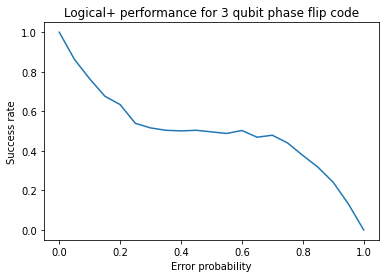

In [434]:
# Initialize lists to store the error probability and success rate
error_probabilities = []
success_rates = []
num_successes = 0
# Perform error correction at increasing error probabilities
for error_probability in range(0, 101, 5):
    error_probability = error_probability / 100.0
    error_probabilities.append(error_probability)
    
    # Perform 100 rounds of error correction
    num_successes = 0
    for i in range(1000):
        # Set up the quantum circuit and encode logical state
        qc = QuantumCircuit(5,2)
        qc.h(0)
        qc.cx(0, 1)
        qc.cx(0, 2)
        for i in range(3):
            qc.h(i)
        # Apply a random error to the qubits with the given probability
        for j in range(3):
            if random.random() < error_probability:
                qc.x(j)
        for j in range(3):
            if random.random() < error_probability:
                qc.z(j)
        
        #Entangle with ancilla qubits
        for i in range(3):
            qc.h(i)
        qc.cx(0,3)
        qc.cx(1,3)
        qc.cx(1,4)
        qc.cx(2,4)
            
        qc.measure(3,0)
        qc.measure(4,1)
            
        backend = BasicAer.get_backend('qasm_simulator')
        result = execute(qc, backend).result()
        counts = result.get_counts()
            
        if '01' in counts:
                qc.x(0)
        if '10' in counts:
                qc.x(2)
        if '11' in counts:
                qc.x(1)
        #Revert back to 000s
        qc.cx(0,1)
        qc.cx(0,2)
        qc.h(0)
        # Create a classical register with 3 bits
        cr = ClassicalRegister(3)
            
            # Add the classical register to the quantum circuit
        qc.add_register(cr)
            
            
        qc.measure(0, 2)
        qc.measure(1, 3)
        qc.measure(2, 4)
        
        
        # Measure the qubits and check if the error was corrected successfully
        backend = BasicAer.get_backend('qasm_simulator')
        result = execute(qc, backend,shots = 1).result()
        counts2 = result.get_counts()
        
        if '000 00' in counts2:
            num_successes += counts2['000 00']
        if '000 01' in counts2:
            num_successes += counts2['000 01']
        if '000 10' in counts2:
            num_successes += counts2['000 10']
        if '000 11' in counts2:
            num_successes += counts2['000 11']
        
    print(error_probability,num_successes)
    # Calculate the success rate and append it to the list
    success_rate = num_successes / 1000.0
    success_rates.append(success_rate)

# Plot the success rate as a function of the error probability
plt.plot(error_probabilities, success_rates)
plt.title('Logical+ performance for 3 qubit phase flip code')
plt.xlabel('Error probability')
plt.ylabel('Success rate')
plt.show()

## The SHOR Code

1000 0.0
861 0.1
660 0.2
576 0.3
491 0.4
503 0.5
489 0.6
442 0.7
337 0.8
145 0.9
0 1.0


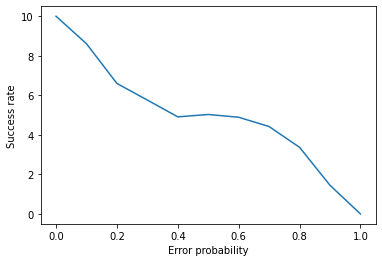

In [436]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister
from qiskit import *
import random
backend = BasicAer.get_backend('qasm_simulator')
# Initialize lists to store the error probability and success rate
error_probabilities = []
success_rates = []
num_successes = 0
# Perform error correction at increasing error probabilities
for error_probability in range(0, 101, 10):
    error_probability = error_probability / 100.0
    error_probabilities.append(error_probability)
    
    # Perform 100 rounds of error correction
    num_successes = 0
    for i in range(1000):
        # Set up the quantum circuit and encode logical state
        qc = QuantumCircuit(17,8)

        #Encode phase section
        qc.cx(0,3)
        qc.cx(0,6)
        qc.h(0)
        qc.h(3)
        qc.h(6)

        #Encode bit flip section
        for i in range(1,3):
            qc.cx(0,i)
        for j in range(4,6):
            qc.cx(3,j)
        for k in range(7,9):
            qc.cx(6,k)
        # Apply a random error to the qubits with the given probability
        for j in range(9):
            if random.random() < error_probability:
                qc.z(j)
        for j in range(9):
            if random.random() < error_probability:
                qc.x(j)
        #Check for bit flip errors
        #First block
        qc.cx(0,9)
        qc.cx(1,9)
        qc.cx(1,10)
        qc.cx(2,10)

        #Second block
        qc.cx(3,11)
        qc.cx(4,11)
        qc.cx(4,12)
        qc.cx(5,12)

        #Third block
        qc.cx(6,13)
        qc.cx(7,13)
        qc.cx(7,14)
        qc.cx(8,14)

        ancilla_map = {9: 0, 10: 1, 11: 2, 12: 3,13: 4,14:5}

        # Measure the ancilla qubits
        for qubit, classical_bit in ancilla_map.items():
            qc.measure(qubit, classical_bit)


        
        result = execute(qc, backend,shots = 1).result()
        counts = result.get_counts()

        counts_dict = dict(counts)
        for key, value in counts_dict.items():
            # Extract the first two digits of the key
            bit_ancilla = key[-2:]
            # Check whether the first two digits are '00'
            if bit_ancilla == '01':
                qc.x(0)
            if bit_ancilla == '10':
                qc.x(2)
            if bit_ancilla == '11':
                qc.x(1)
            bit_ancilla = key[4:6]
            # Check whether the first two digits are '00'
            if bit_ancilla == '01':
                qc.x(3)
            if bit_ancilla == '10':
                qc.x(5)
            if bit_ancilla == '11':
                qc.x(4)
            bit_ancilla = key[2:4]
            # Check whether the first two digits are '00'
            if bit_ancilla == '01':
                qc.x(6)
            if bit_ancilla == '10':
                qc.x(8)
            if bit_ancilla == '11':
                qc.x(7)

        
        #phase flip syndrome measurements
        for i in range(9):
            qc.h(i)
        #Entangle with ancillas
        for i in range(6):
            qc.cx(i,15)
        for i in range(3,9):
            qc.cx(i,16)

        qc.measure(15,6)
        qc.measure(16,7)

        
        result = execute(qc, backend,shots = 1).result()
        counts2 = result.get_counts()

        #Back into X basis
        for i in range(9):
            qc.h(i)

        counts2_dict = dict(counts2)
        for key, value in counts2_dict.items():
            # Extract the first two digits of the key
            phase_ancilla = key[:2]

            # Check whether the first two digits are '00'
            if phase_ancilla == '01':
                qc.z(0)
            if phase_ancilla == '10':
                qc.z(6)
            if phase_ancilla == '11':
                qc.z(3)
        
        
        # Create a classical register with 3 bits
        cr = ClassicalRegister(9)

        # Add the classical register to the quantum circuit
        qc.add_register(cr)
        
        #Revert back to 000s
        for i in range(1,3):
            qc.cx(0,i)
        for j in range(4,6):
            qc.cx(3,j)
        for k in range(7,9):
            qc.cx(6,k)
        qc.h(0)
        qc.h(3)
        qc.h(6)
        qc.cx(0,3)
        qc.cx(0,6)
        # Measure the qubits and check if the error was corrected successfully
        for i in range(9):
            qc.measure(i, i+8)
        
        result = execute(qc, backend,shots = 1).result()
        counts3 = result.get_counts()
        counts3_dict = dict(counts3)
        
        
        
        for key, value in counts3_dict.items():
            if key[:9] == '000000000':
                num_successes += value
    
    print(num_successes, error_probability)
    qc.draw('mpl')
    # Calculate the success rate and append it to the list
    success_rate = num_successes / 1000.0
    success_rates.append(success_rate)

    
#Plot the success rate as a function of the error probability
plt.plot(error_probabilities, success_rates)
plt.title('Logical 0 performance for the Shor code')
plt.xlabel('Error probability')
plt.ylabel('Success rate')
plt.show()


1000 0.0
910 0.1
740 0.2
581 0.3
521 0.4
517 0.5
500 0.6
401 0.7
266 0.8
100 0.9
0 1.0


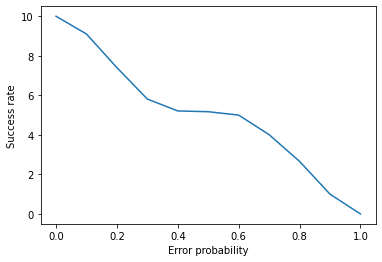

In [438]:
backend = BasicAer.get_backend('qasm_simulator')
# Initialize lists to store the error probability and success rate
error_probabilities = []
success_rates = []
num_successes = 0
# Perform error correction at increasing error probabilities
for error_probability in range(0, 101, 10):
    error_probability = error_probability / 100.0
    error_probabilities.append(error_probability)
    
    # Perform 100 rounds of error correction
    num_successes = 0
    for i in range(1000):
        # Set up the quantum circuit and encode logical state
        qc = QuantumCircuit(17,8)

        #Encode phase section
        qc.h(0)
        qc.cx(0,3)
        qc.cx(0,6)
        qc.h(0)
        qc.h(3)
        qc.h(6)

        #Encode bit flip section
        for i in range(1,3):
            qc.cx(0,i)
        for j in range(4,6):
            qc.cx(3,j)
        for k in range(7,9):
            qc.cx(6,k)
        # Apply a random error to the qubits with the given probability
        for j in range(9):
            if random.random() < error_probability:
                qc.z(j)
        for j in range(9):
            if random.random() < error_probability:
                qc.x(j)
        #Check for bit flip errors
        #First block
        qc.cx(0,9)
        qc.cx(1,9)
        qc.cx(1,10)
        qc.cx(2,10)

        #Second block
        qc.cx(3,11)
        qc.cx(4,11)
        qc.cx(4,12)
        qc.cx(5,12)

        #Third block
        qc.cx(6,13)
        qc.cx(7,13)
        qc.cx(7,14)
        qc.cx(8,14)

        ancilla_map = {9: 0, 10: 1, 11: 2, 12: 3,13: 4,14:5}

        # Measure the ancilla qubits
        for qubit, classical_bit in ancilla_map.items():
            qc.measure(qubit, classical_bit)


        
        result = execute(qc, backend,shots = 1).result()
        counts = result.get_counts()

        counts_dict = dict(counts)
        for key, value in counts_dict.items():
            # Extract the first two digits of the key
            bit_ancilla = key[-2:]
            # Check whether the first two digits are '00'
            if bit_ancilla == '01':
                qc.x(0)
            if bit_ancilla == '10':
                qc.x(2)
            if bit_ancilla == '11':
                qc.x(1)
            bit_ancilla = key[4:6]
            # Check whether the first two digits are '00'
            if bit_ancilla == '01':
                qc.x(3)
            if bit_ancilla == '10':
                qc.x(5)
            if bit_ancilla == '11':
                qc.x(4)
            bit_ancilla = key[2:4]
            # Check whether the first two digits are '00'
            if bit_ancilla == '01':
                qc.x(6)
            if bit_ancilla == '10':
                qc.x(8)
            if bit_ancilla == '11':
                qc.x(7)

        
        #phase flip syndrome measurements
        for i in range(9):
            qc.h(i)
        #Entangle with ancillas
        for i in range(6):
            qc.cx(i,15)
        for i in range(3,9):
            qc.cx(i,16)

        qc.measure(15,6)
        qc.measure(16,7)

        
        result = execute(qc, backend,shots = 1).result()
        counts2 = result.get_counts()

        #Back into X basis
        for i in range(9):
            qc.h(i)

        counts2_dict = dict(counts2)
        for key, value in counts2_dict.items():
            # Extract the first two digits of the key
            phase_ancilla = key[:2]

            # Check whether the first two digits are '00'
            if phase_ancilla == '01':
                qc.z(0)
            if phase_ancilla == '10':
                qc.z(6)
            if phase_ancilla == '11':
                qc.z(3)
        
        
        # Create a classical register with 3 bits
        cr = ClassicalRegister(9)

        # Add the classical register to the quantum circuit
        qc.add_register(cr)
        
        #Revert back to 000s
        for i in range(1,3):
            qc.cx(0,i)
        for j in range(4,6):
            qc.cx(3,j)
        for k in range(7,9):
            qc.cx(6,k)
        qc.h(0)
        qc.h(3)
        qc.h(6)
        qc.cx(0,3)
        qc.cx(0,6)
        qc.h(0)
        # Measure the qubits and check if the error was corrected successfully
        for i in range(9):
            qc.measure(i, i+8)
        
        result = execute(qc, backend,shots = 1).result()
        counts3 = result.get_counts()
        counts3_dict = dict(counts3)
        
        
        
        for key, value in counts3_dict.items():
            if key[:9] == '000000000':
                num_successes += value
    
    print(num_successes, error_probability)
    qc.draw('mpl')
    # Calculate the success rate and append it to the list
    success_rate = num_successes / 1000.0
    success_rates.append(success_rate)

    
#Plot the success rate as a function of the error probability
plt.plot(error_probabilities, success_rates)
plt.xlabel('Error probability')
plt.ylabel('Success rate')
plt.show()